Given a desired joint trajectory $\theta_d(t)$, the feedforward-PID control law is given as follows:
$$ u = \dot{\theta}(t) = \dot{\theta_d} + K_p \theta_e(t) + K_i \int_0^t \theta_e \text{d}t + K_d \dot{\theta}_e$$

where:

- $\dot{\theta}_d$ is the desired velocity;
- $\theta_e := \theta_d(t) - \theta(t)$ is the angle error;
- $K_p,\, K_i,\, K_d$ are the PID coefficients.

In [20]:
from robot_analysis.planar_nr import PlanarRobotNR, plot_final, animate_all
from robot_analysis.controller import FeedforwardPID
import numpy as np

links = {
    'l': [1.0, 0.5],  # Links lengths [m]
    'm': [1.0, 1.0],  # Links masses [kg]
    'b': [1.0, 1.0],  # Friction coefficients
    'velocity_max': [10.0, 10.0],
    'tau_max': [50.0, 50.0],
}
robot = PlanarRobotNR(links, n_max=500)

Created robot with 2 link(s).
Kinematics: End effector positions are:
	pos_x = Matrix([[l1*cos(q1(t))], [l1*cos(q1(t)) + l2*cos(q1(t) + q2(t))]])
	pos_y = Matrix([[l1*sin(q1(t))], [l1*sin(q1(t)) + l2*sin(q1(t) + q2(t))]])
Dynamics: M, C, G matrices are:
	M = Matrix([[1.0*l1**2*m1 + 1.0*m2*(l1**2 + 2*l1*l2*cos(q2(t)) + l2**2), 1.0*m2*(l1*l2*cos(q2(t)) + l2**2)], [1.0*l1*l2*m2*cos(q2(t)) + 1.0*l2**2*m2, 1.0*l2**2*m2]])
	C = Matrix([[1.0*b1*Derivative(q1(t), t) - 2.0*l1*l2*m2*sin(q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t) - 1.0*l1*l2*m2*sin(q2(t))*Derivative(q2(t), t)**2], [1.0*b2*Derivative(q2(t), t) + 1.0*l1*l2*m2*sin(q2(t))*Derivative(q1(t), t)**2]])
	G = Matrix([[9.81*l1*m1*cos(q1(t)) + 9.81*l1*m2*cos(q1(t)) + 9.81*l2*m2*cos(q1(t) + q2(t))], [9.81*l2*m2*cos(q1(t) + q2(t))]])


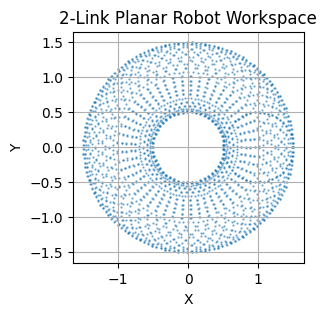

array([[ 1.50000000e+00,  0.00000000e+00],
       [ 1.49589501e+00,  6.39385808e-02],
       [ 1.48364743e+00,  1.26827292e-01],
       ...,
       [ 1.48364743e+00, -1.26827292e-01],
       [ 1.49589501e+00, -6.39385808e-02],
       [ 1.50000000e+00, -4.89858720e-16]], shape=(2500, 2))

In [21]:
robot.compute_work_space(resolution=50)

In [22]:
pos_x_apple = 1
pos_y_apple = 0.0
q_desired = robot.compute_inversed_kinematics(
    pos_x_apple, pos_y_apple, guess=[np.pi / 3] * 2
)

In [ ]:
ff_pid = FeedforwardPID(
    t_step=robot.t_step,
    n=2,
    u_name='velocity',
    kP=np.array([[1.0, 1.0]]).T,
    kI=np.array([[1.0, 1.0]]).T,
)
data = robot.simulate(q_desired, controller=ff_pid)

Finished simulation, generating animation...


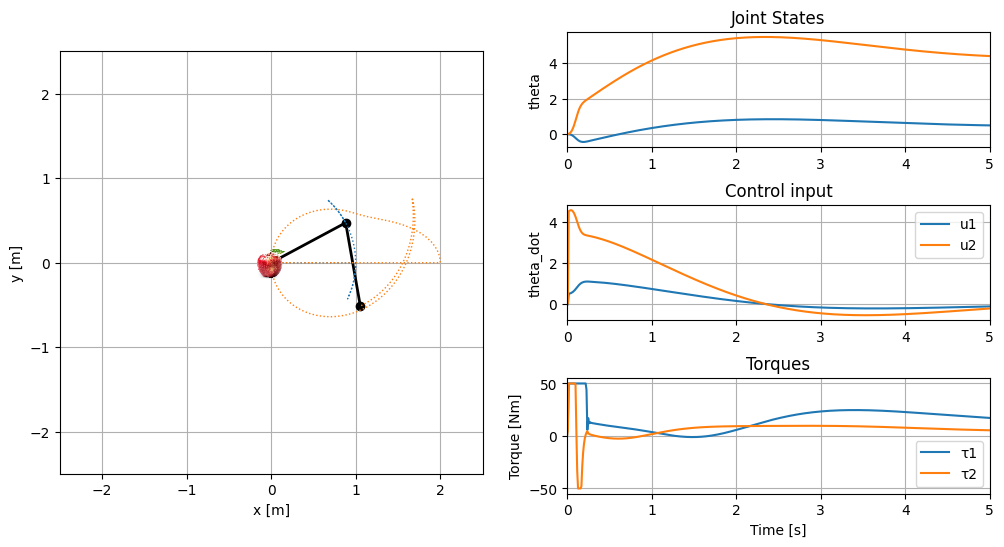

In [29]:
plot_final(robot)

In [25]:
q_desired

array([[0.50536051],
       [4.45970873]])

In [26]:
robot.q_desired

array([[0.],
       [0.]])

In [27]:
robot.pos_y

array([[ 0.49790948],
       [-0.47282339]])